In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense ,Flatten
from keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop


In [2]:
df=pd.read_csv('Churn_Modelling - Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.set_index('RowNumber',inplace=True)

In [7]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

0

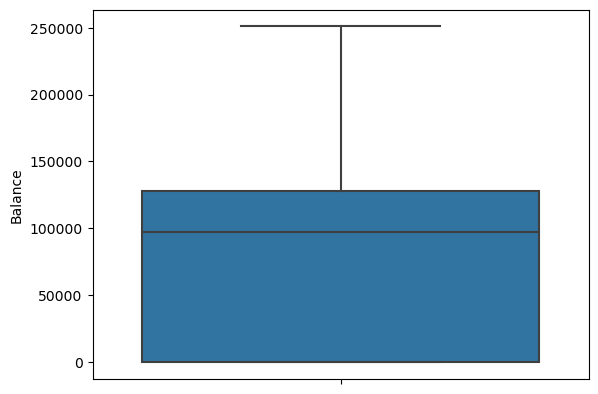

In [10]:
sns.boxplot(data=df,y='Balance')
plt.show()

In [11]:
def Remove_Outliers(col_name):
    q1=df[col_name].quantile(0.25)
    q3=df[col_name].quantile(0.75)
    iqr=q3-q1
    df[col_name][(df[col_name]<(q1-iqr*1.5))|(df[col_name]>(q3+iqr*1.5))]=np.nan

In [12]:
Remove_Outliers('Balance')

C:\Users\PC\AppData\Local\Temp\ipykernel_8600\4246327234.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col_name][(df[col_name]<(q1-iqr*1.5))|(df[col_name]>(q3+iqr*1.5))]=np.nan


In [13]:
df.isnull().sum() # so there is no outliers in the Balance Colomn

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
#def Unique_values():
for col in df:
    unique_val=df[col].unique()
    unique_count=len(unique_val)
    
    if unique_count<5:
        print(f"The number of the unique featuers of column {col} are : {unique_count} and they are ' {unique_val} '")
    else:
        print("*"*50)
        print(f"The unique values of the featuers of column {col} are :  {unique_count} ")
    

**************************************************
The unique values of the featuers of column CustomerId are :  10000 
**************************************************
The unique values of the featuers of column Surname are :  2932 
**************************************************
The unique values of the featuers of column CreditScore are :  460 
The number of the unique featuers of column Geography are : 3 and they are ' ['France' 'Spain' 'Germany'] '
The number of the unique featuers of column Gender are : 2 and they are ' ['Female' 'Male'] '
**************************************************
The unique values of the featuers of column Age are :  70 
**************************************************
The unique values of the featuers of column Tenure are :  11 
**************************************************
The unique values of the featuers of column Balance are :  6382 
The number of the unique featuers of column NumOfProducts are : 4 and they are ' [1 3 2 4] '
The number 

In [15]:
def Plot_Histogram(col_name1):
    plt.hist(df[col_name1],bins='auto',alpha=0.5,label=col_name1)

    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col_name1}')
    plt.legend()
    plt.show()

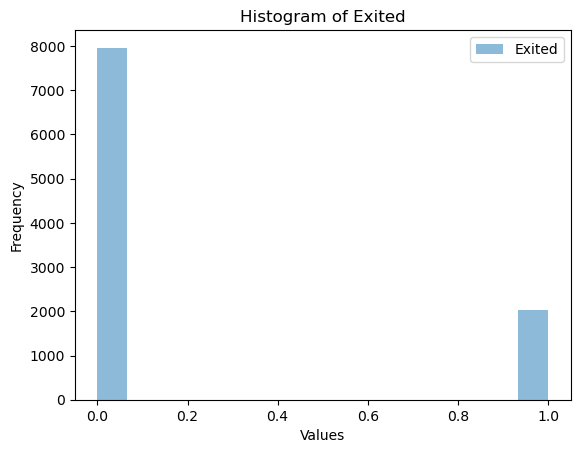

In [16]:
Plot_Histogram("Exited")

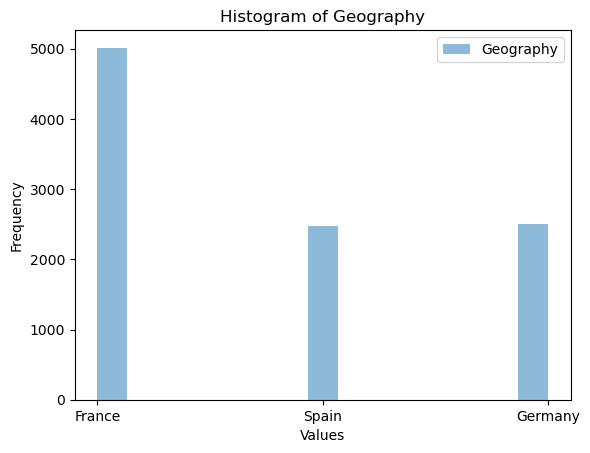

In [17]:
Plot_Histogram("Geography")

In [18]:
def Count_plot(col_name):
    plt.figure(figsize=(5,5))
    sns.countplot(x=col_name,data=df)
    plt.title(col_name)
    #plt.legend(title=col_name)
    plt.show

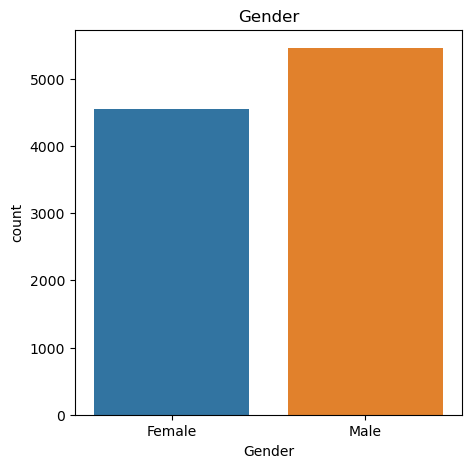

In [19]:
Count_plot('Gender')

In [20]:
def Pivot_Table(col_name1,col_name2):
    filtered_df = df[df[col_name1] != 'Exited']
    
    pivot_table=filtered_df.pivot_table(index=col_name1,columns=col_name2,aggfunc='size')
    pivot_table.plot(kind="bar")

    #plt.xticks(col_name1)

    plt.ylabel("Counts")

    plt.title(f'{col_name1} and {col_name2} acording to values')

    plt.legend(title=col_name2)

    plt.show()

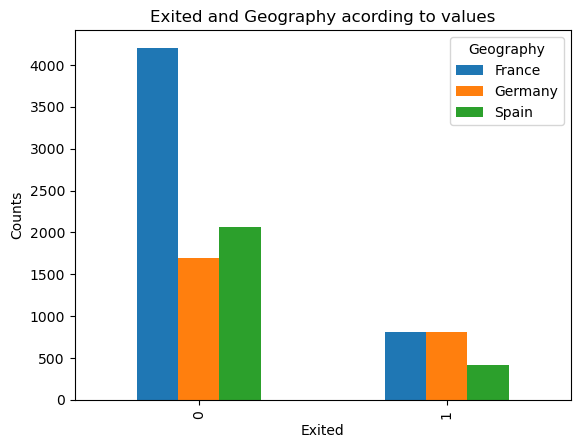

In [21]:
Pivot_Table("Exited","Geography")

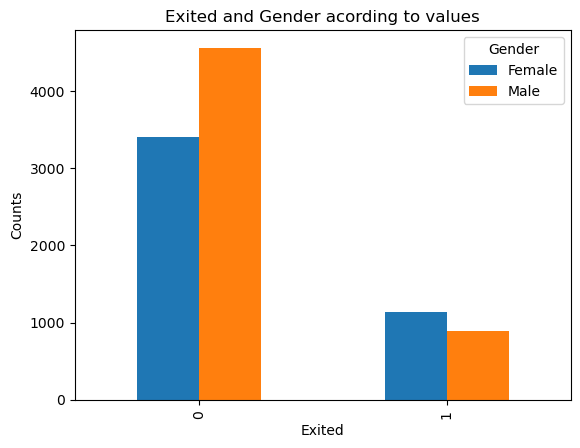

In [22]:
Pivot_Table("Exited","Gender")

In [23]:
df=df.drop('Surname',axis=1)

In [24]:
my_dict={
    "Male":0,
    "Female":1,
    "France":0,
    "Germany":1,
    "Spain":2
}
df=df[df.columns].replace(my_dict)
df=df.apply(pd.to_numeric,errors="ignore")

In [25]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,
1,15634602,619,0,1,42,2,0.00,1,1,1,101348.88,1
2,15647311,608,2,1,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,0,1,42,8,159660.80,3,1,0,113931.57,1
4,15701354,699,0,1,39,1,0.00,2,0,0,93826.63,0
5,15737888,850,2,1,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:>

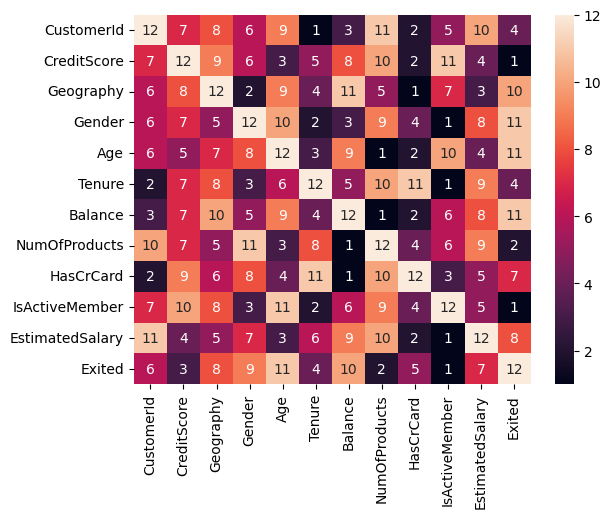

In [26]:
sns.heatmap(data=df.corr().rank(axis=1),annot=True,)

In [27]:
file_path = 'C:\\Users\\PC\\Downloads\\New_Cleaned_dataset.csv'

# Save the DataFrame as a CSV file
df.to_csv(file_path, index=False)

In [28]:
df.shape

(10000, 12)

In [29]:
x=df.drop(
['CustomerId','CreditScore','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited'],axis=1)
y=df['Exited']
features_train,features_test,labels_train,labels_test=train_test_split(x,y,test_size=0.2,
                                                                       random_state=42,
                                                                       stratify=y,
                                                                       shuffle=True,)

In [30]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

In [31]:
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


In [35]:
model = Sequential()
model.add(Flatten(input_dim=features_train.shape[1]))
#model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [36]:
model.fit(features_train,
          labels_train,
          epochs=15,
          batch_size=32,
          validation_data=(features_test,labels_test),
         )
          

Epoch 1/15
250/250 [==============================] - 2s 5ms/step - loss: 0.4555 - accuracy: 0.7952 - val_loss: 0.4351 - val_accuracy: 0.8075
Epoch 2/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4298 - accuracy: 0.8102 - val_loss: 0.4276 - val_accuracy: 0.8095
Epoch 3/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4256 - accuracy: 0.8105 - val_loss: 0.4265 - val_accuracy: 0.8115
Epoch 4/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4226 - accuracy: 0.8167 - val_loss: 0.4280 - val_accuracy: 0.8100
Epoch 5/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4197 - accuracy: 0.8207 - val_loss: 0.4227 - val_accuracy: 0.8150
Epoch 6/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4176 - accuracy: 0.8219 - val_loss: 0.4256 - val_accuracy: 0.8115
Epoch 7/15
250/250 [==============================] - 1s 3ms/step - loss: 0.4168 - accuracy: 0.8226 - val_loss: 0.4247 - val_accuracy: 0.8210
Epoch 

In [37]:
loss, accuracy = model.evaluate(features_test, labels_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

63/63 [==============================] - 0s 3ms/step - loss: 0.4225 - accuracy: 0.8210
Test Loss: 0.422455370426178
Test Accuracy: 0.8209999799728394
